In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [9]:
path = r'C:\Users\kuohe\ClimateWins\02 Data'

In [10]:
col_names = ['DATE',
             'BASEL_pleasant_weather',
             'BELGRADE_pleasant_weather',
             'BUDAPEST_pleasant_weather',
             'DEBILT_pleasant_weather',
             'DUSSELDORF_pleasant_weather',
             'HEATHROW_pleasant_weather',
             'KASSEL_pleasant_weather',
             'LJUBLJANA_pleasant_weather',
             'MAASTRICHT_pleasant_weather',
             'MADRID_pleasant_weather',
             'MUNCHENB_pleasant_weather',
             'OSLO_pleasant_weather',
             'SONNBLICK_pleasant_weather',
             'STOCKHOLM_pleasant_weather',
             'VALENTIA_pleasant_weather']

df_labels = pd.read_csv(os.path.join(path, 'pleasant weather.csv'), index_col=False)

In [11]:
scaled = pd.read_csv(os.path.join(path, 'Dataset_scaled_correct.csv'))

In [12]:
scaled['DATE']=df_labels['DATE']

In [16]:
df_labels['DATE'] = df_labels['DATE'].astype(str)

df_1980_labels = df_labels[df_labels['DATE'].str.startswith('1980')]
df_1980 = scaled[scaled['DATE'].str.startswith('1980')]

AttributeError: Can only use .str accessor with string values!

In [19]:
df_labels['DATE'] = df_labels['DATE'].astype(str)
if 'DATE' not in scaled.columns:
else:
    if scaled['DATE'].dtype != object:
        scaled['DATE'] = scaled['DATE'].astype(str)

    df_1980_labels = df_labels[df_labels['DATE'].str.startswith('1980')]
    df_1980 = scaled[scaled['DATE'].str.startswith('1980')]


In [20]:
df_1980

,id,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
7305,-0.629350,-1.599964,0.244897,-0.02793,0.645423,-0.001949,-1.015150,-0.425473,3.808436,-0.694136,...,1.042971,-0.115825,-1.136306,-0.431633,-0.024706,-1.039536,-1.899944,-1.585517,-2.161377,19800101
7306,-0.629199,-1.599964,-0.170720,-0.02793,0.735760,-0.001949,-1.079587,-0.265148,3.309978,-0.856522,...,0.902363,0.490118,-1.195214,1.260825,-0.024706,-1.039536,-1.299100,-1.886120,-0.579689,19800102
7307,-0.629048,-1.599964,1.076130,-0.02793,0.374412,-0.001949,-0.972191,-0.305229,4.306894,-0.601344,...,1.746013,-0.787023,-1.183432,0.219312,-0.024706,-1.039536,-0.457920,-0.465088,-0.378383,19800103
7308,-0.628897,-1.599964,1.076130,-0.02793,1.639129,-0.001949,-1.251420,0.416236,4.306894,-1.065304,...,-0.363113,-1.010756,-0.983148,0.100959,-0.024706,-0.588999,-0.908552,-0.574398,-1.241122,19800104
7309,-0.628746,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.176243,0.075544,3.808436,-1.018908,...,-0.503721,-0.078536,-1.077399,-0.455304,-0.024706,-1.009500,-0.938594,-0.492416,-1.154849,19800105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7666,-0.574860,1.594371,-0.170720,-0.02793,-0.348283,-0.001949,-0.843317,-0.445514,-0.179228,-0.090988,...,1.605405,1.851159,-1.148088,-0.265938,-0.024706,-1.039536,-1.208974,-1.257587,-1.011059,19801227
7667,-0.574709,1.594371,0.660514,-0.02793,1.277781,-0.001949,-0.907754,-0.445514,-0.179228,-0.346166,...,2.027230,2.009636,-1.124525,-0.431633,-0.024706,-1.039536,-1.058763,-1.066294,-0.867269,19801228
7668,-0.574558,1.594371,-1.833187,-0.02793,0.464749,-0.001949,-0.703703,-0.445514,-0.179228,0.512161,...,1.746013,1.646070,-1.148088,-0.348786,-0.024706,-1.039536,-0.277667,0.245427,-0.809753,19801229
7669,-0.574407,1.594371,0.660514,-0.02793,0.464749,-0.001949,-0.950712,-0.445514,-0.179228,-0.508552,...,1.183580,1.245216,-1.136306,-0.336950,-0.024706,-1.009500,-0.157498,0.272755,-0.579689,19801230


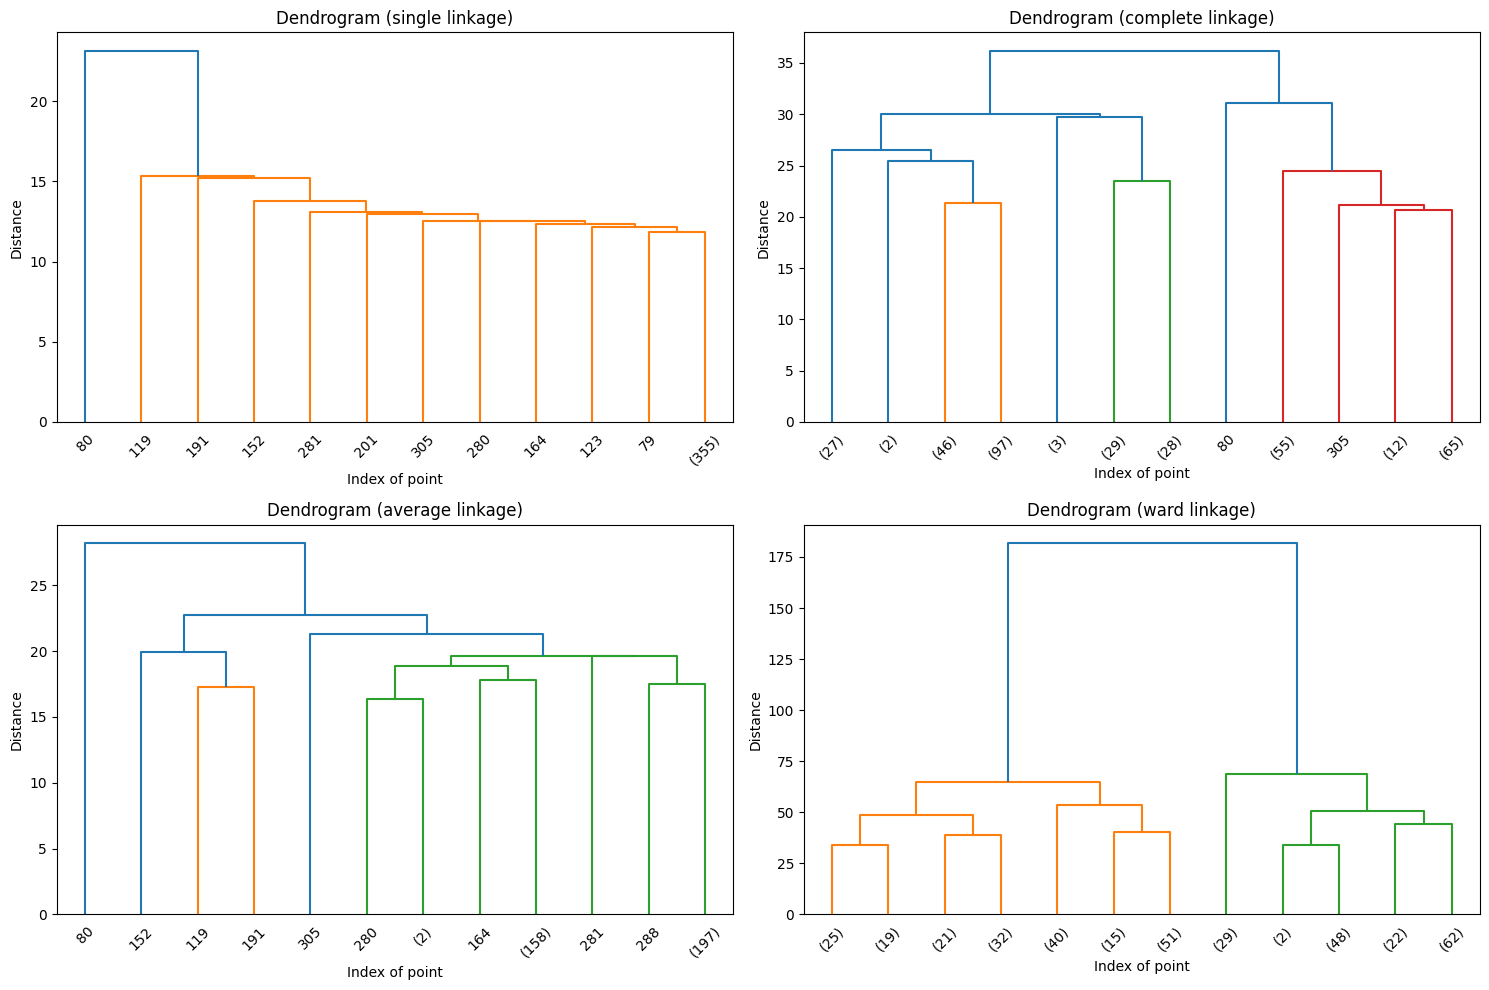

In [21]:
data_for_clustering = df_1980.drop(['DATE','id','MONTH'], axis=1)

methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the array to make iteration easier

for i, method in enumerate(methods):
    linked = linkage(data_for_clustering, method=method)
    dendrogram(linked, ax=axes[i], truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=10.)
    axes[i].set_title(f'Dendrogram ({method} linkage)')
    axes[i].set_xlabel('Index of point')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()


In [22]:
#Run the PCA model, reducing to two components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_1980)
principalComponents

array([[ 5.66151737e+02,  8.46878028e+00],
       [ 5.65155857e+02,  8.95335848e+00],
       [ 5.64165680e+02,  9.99417910e+00],
       [ 5.63156985e+02,  1.00156656e+01],
       [ 5.62147023e+02,  8.21759148e+00],
       [ 5.61146957e+02,  8.34249242e+00],
       [ 5.60149823e+02,  8.28917274e+00],
       [ 5.59155940e+02,  9.00233213e+00],
       [ 5.58164463e+02,  9.43236268e+00],
       [ 5.57164257e+02,  1.00256138e+01],
       [ 5.56173712e+02,  1.12349759e+01],
       [ 5.55174447e+02,  1.12829050e+01],
       [ 5.54173673e+02,  1.04070800e+01],
       [ 5.53168752e+02,  1.07707155e+01],
       [ 5.52175103e+02,  1.18095187e+01],
       [ 5.51169913e+02,  1.07491577e+01],
       [ 5.50173907e+02,  9.64587084e+00],
       [ 5.49170989e+02,  9.77352771e+00],
       [ 5.48172909e+02,  9.58642052e+00],
       [ 5.47158907e+02,  8.95455395e+00],
       [ 5.46152102e+02,  8.63941963e+00],
       [ 5.45140209e+02,  7.08730801e+00],
       [ 5.44137899e+02,  6.20345557e+00],
       [ 5.

In [23]:
pc_df= pd.DataFrame({'PC1':principalComponents[:,0],'PC2':principalComponents[:,1]})

In [24]:
pc_df

,PC1,PC2
0,566.151737,8.468780
1,565.155857,8.953358
2,564.165680,9.994179
3,563.156985,10.015666
4,562.147023,8.217591
...,...,...
361,-559.834702,12.115427
362,-560.841908,12.322778
363,-561.860721,11.049791
364,-562.867742,9.792078


In [25]:
linked = linkage(data_for_clustering, method='ward')

In [26]:
pc_df['clust2']=fcluster(linked,2, criterion='maxclust')
pc_df.head()

,PC1,PC2,clust2
0,566.151737,8.468780,1
1,565.155857,8.953358,1
2,564.165680,9.994179,1
3,563.156985,10.015666,1
4,562.147023,8.217591,1


In [27]:
pc_df["clust2"].value_counts()

clust2
1    203
2    163
Name: count, dtype: int64

In [28]:
pc_df['MADRID_pleasant_weather']=df_1980_labels['MADRID_pleasant_weather'].reset_index(drop=True)

In [29]:
pc_df

,PC1,PC2,clust2,MADRID_pleasant_weather
0,566.151737,8.468780,1,0
1,565.155857,8.953358,1,0
2,564.165680,9.994179,1,0
3,563.156985,10.015666,1,0
4,562.147023,8.217591,1,0
...,...,...,...,...
361,-559.834702,12.115427,1,0
362,-560.841908,12.322778,1,0
363,-561.860721,11.049791,1,0
364,-562.867742,9.792078,1,0


In [30]:
df_1980_labels['MADRID_pleasant_weather'].value_counts()

MADRID_pleasant_weather
0    212
1    154
Name: count, dtype: int64

<Axes: title={'center': 'MADRID_pleasant_weather'}, xlabel='PC1', ylabel='PC2'>

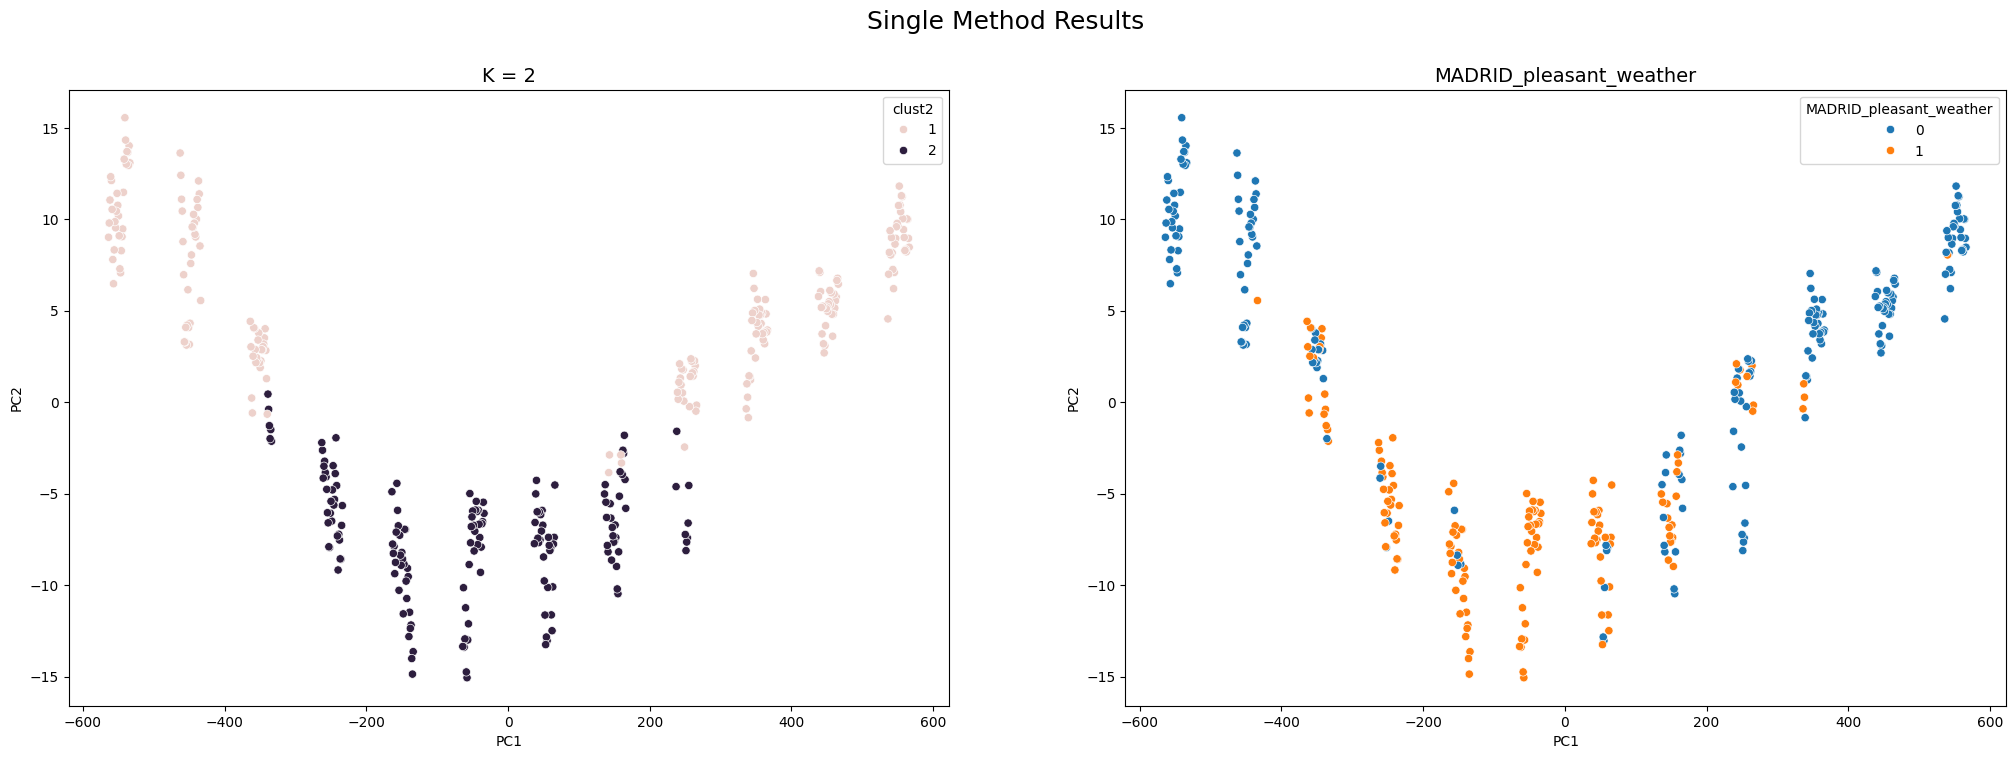

In [31]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Single Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PC1",y="PC2", data=pc_df, hue="clust2")

plt.subplot(1,2,2)
plt.title("MADRID_pleasant_weather",fontsize=14)
sns.scatterplot(x="PC1",y="PC2", data=pc_df, hue="MADRID_pleasant_weather")

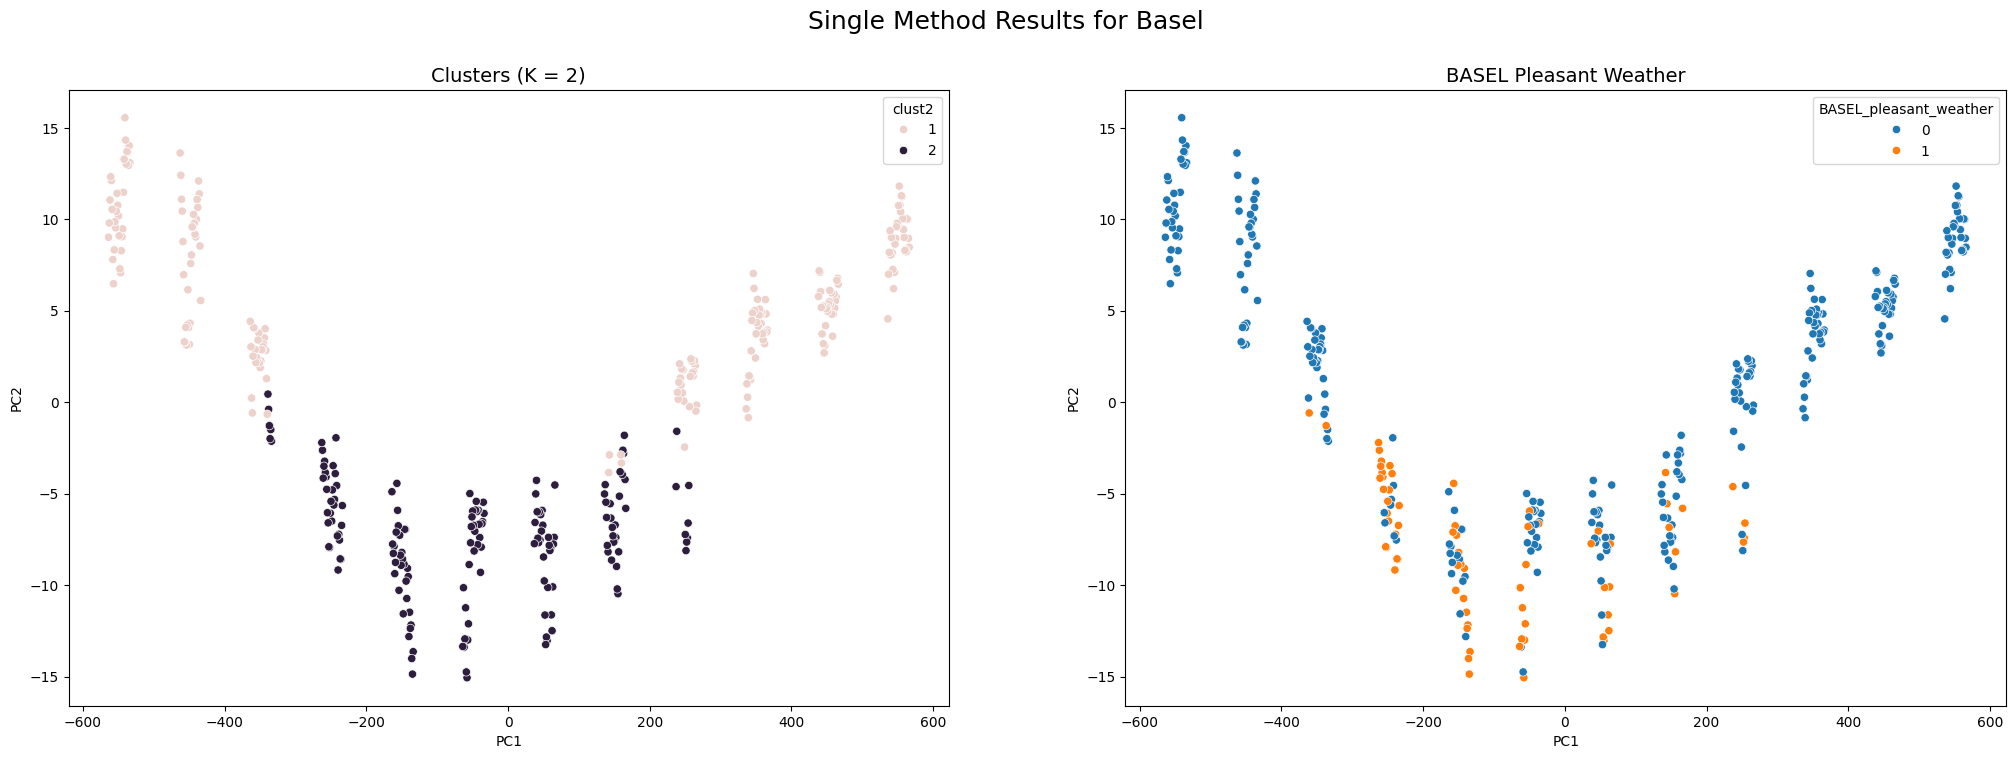

In [34]:
# Add BASEL_pleasant_weather to the pc_df DataFrame
pc_df['BASEL_pleasant_weather'] = df_1980_labels['BASEL_pleasant_weather'].reset_index(drop=True)

# Plotting
plt.figure(figsize=(25,8))

plt.suptitle("Single Method Results for Basel", fontsize=18)

# Plot for clusters with K = 2
plt.subplot(1, 2, 1)
plt.title("Clusters (K = 2)", fontsize=14)
sns.scatterplot(x="PC1", y="PC2", data=pc_df, hue="clust2")

# Plot for BASEL_pleasant_weather
plt.subplot(1, 2, 2)
plt.title("BASEL Pleasant Weather", fontsize=14)
sns.scatterplot(x="PC1", y="PC2", data=pc_df, hue="BASEL_pleasant_weather")

plt.show()

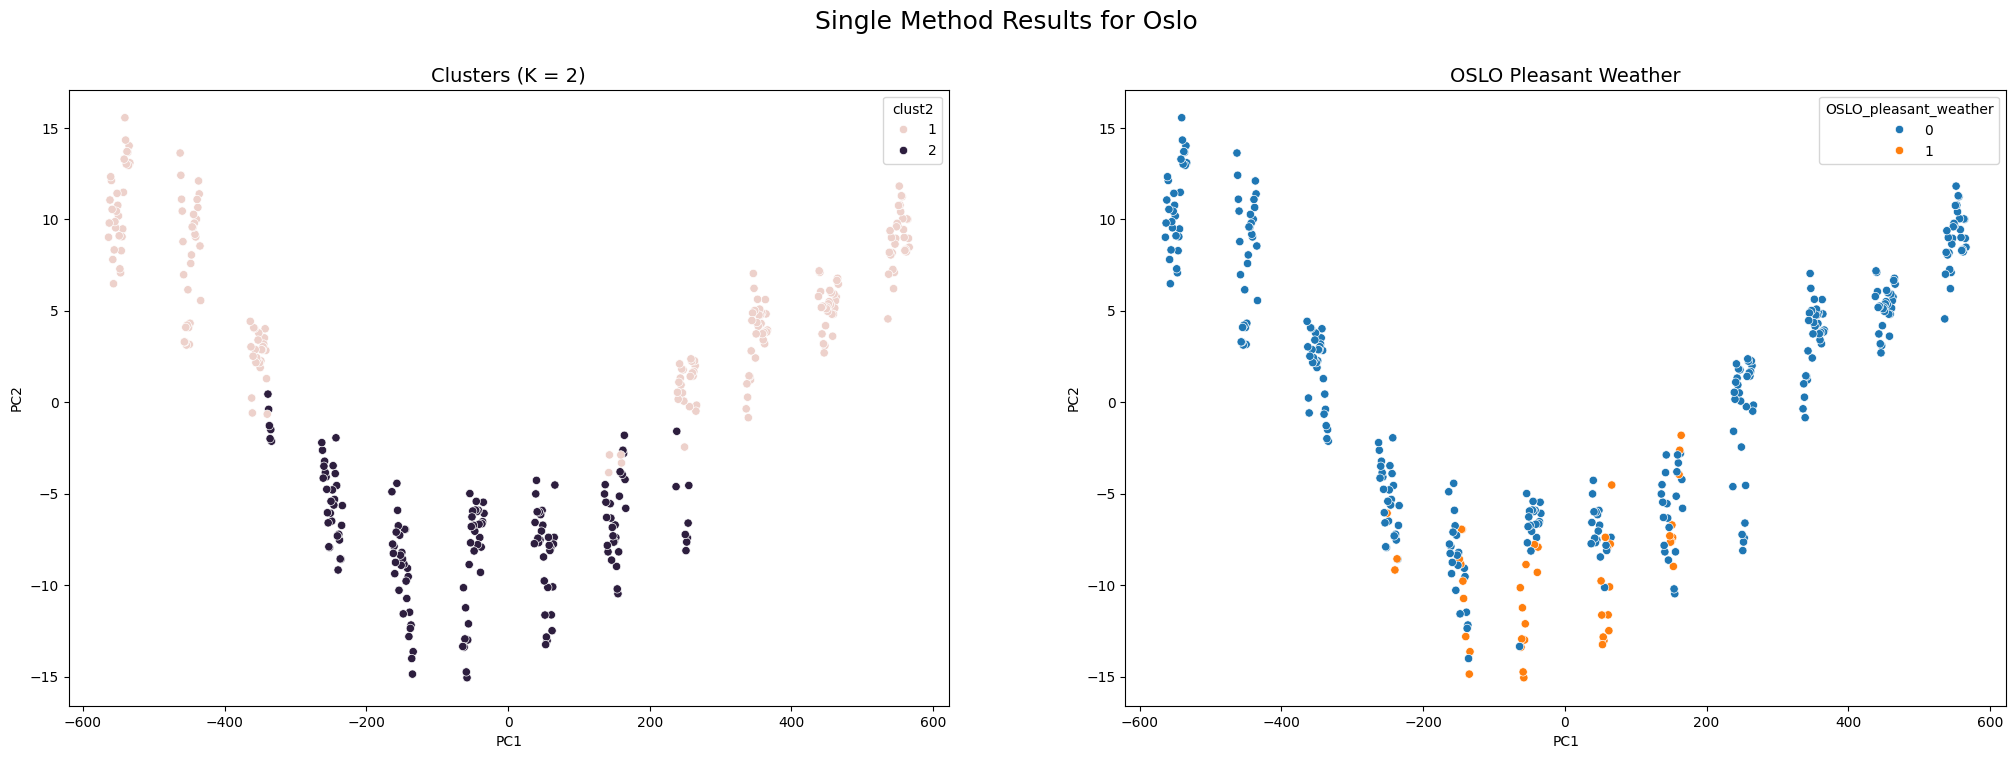

In [35]:
# Add OSLO_pleasant_weather to the pc_df DataFrame
pc_df['OSLO_pleasant_weather'] = df_1980_labels['OSLO_pleasant_weather'].reset_index(drop=True)

# Plotting
plt.figure(figsize=(25,8))

plt.suptitle("Single Method Results for Oslo", fontsize=18)

# Plot for clusters with K = 2
plt.subplot(1, 2, 1)
plt.title("Clusters (K = 2)", fontsize=14)
sns.scatterplot(x="PC1", y="PC2", data=pc_df, hue="clust2")

# Plot for OSLO_pleasant_weather
plt.subplot(1, 2, 2)
plt.title("OSLO Pleasant Weather", fontsize=14)
sns.scatterplot(x="PC1", y="PC2", data=pc_df, hue="OSLO_pleasant_weather")

plt.show()


In [36]:
# Export the PCA results to a CSV file in the specified directory
pc_df.to_csv('C:\\Users\\kuohe\\ClimateWins\\02 Data\\reduced_data_PCA.csv', index=False)

print("Reduced dataset exported to 'C:\\Users\\kuohe\\ClimateWins\\02 Data\\reduced_data_PCA.csv'.")


Reduced dataset exported to 'C:\Users\kuohe\ClimateWins\02 Data\reduced_data_PCA.csv'.


Columns in reduced_data: Index(['PC1', 'PC2', 'clust2', 'MADRID_pleasant_weather',
       'BASEL_pleasant_weather', 'OSLO_pleasant_weather'],
      dtype='object')


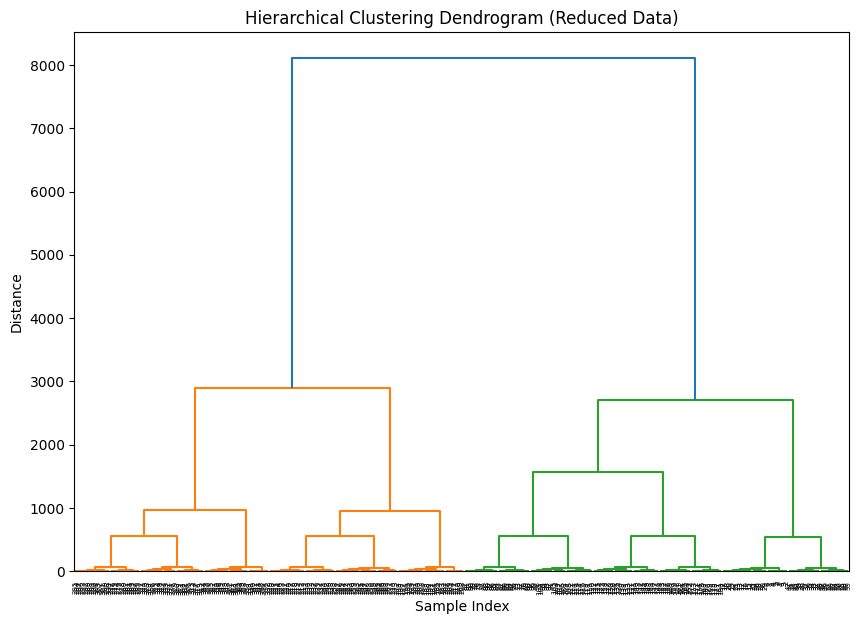

In [38]:
reduced_data = pd.read_csv('C:\\Users\\kuohe\\ClimateWins\\02 Data\\reduced_data_PCA.csv')

print("Columns in reduced_data:", reduced_data.columns)

linked = linkage(reduced_data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Reduced Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
